In [1]:
import os
import numpy as np
from PIL import ImageStat, Image
from natsort import natsorted
import cv2
import pandas as pd

In [2]:
imagesData = '/home/amirali/Desktop/Thesis/Codes/raw_data/natural_scene_templates/'
imageFiles = natsorted(os.listdir(imagesData))

In [3]:
def brightness(im_file):
   im = Image.open(im_file).convert('L')
   stat = ImageStat.Stat(im)
   return stat.rms[0]

In [4]:
luminance = []
for img in imageFiles:
    luminance.append(brightness(os.path.join(imagesData, img)))

In [5]:
luminance, imageFiles = zip(*sorted(zip(luminance, imageFiles)))

In [6]:
luminanceImageIndices = []
for img in imageFiles:
    luminanceImageIndices.append(int(img.split('.')[0].split('_')[-1]))

In [7]:
lowLuminance  = luminanceImageIndices[:20]
highLuminance = luminanceImageIndices[-20:]

In [8]:
imagesData = '/home/amirali/Desktop/Thesis/Codes/raw_data/natural_scene_templates/'
imageFiles = natsorted(os.listdir(imagesData))

In [9]:
contrast = []
for img in imageFiles:
    img = cv2.imread(os.path.join(imagesData, img))
    img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    contrast.append(img_grey.std())

In [10]:
contrast, imageFiles = zip(*sorted(zip(contrast, imageFiles)))

In [11]:
contrastImageIndices = []
for img in imageFiles:
    contrastImageIndices.append(int(img.split('.')[0].split('_')[-1]))

In [12]:
lowContrast  = contrastImageIndices[:20]
highContrast = contrastImageIndices[-20:]

In [20]:
lowSF  = spatialfreqImageIndices[:20]
highSF = spatialfreqImageIndices[-20:]

In [21]:
lumcontsf       = np.zeros((20, 6))
lumcontsf[:, 0] = lowLuminance
lumcontsf[:, 1] = highLuminance
lumcontsf[:, 2] = lowContrast
lumcontsf[:, 3] = highContrast
lumcontsf[:, 4] = lowSF
lumcontsf[:, 5] = highSF

In [22]:
df = pd.DataFrame(lumcontsf, columns = ['LLuminance', 'HLuminance', 'LContrast', 'HContrast', 'LSF', 'HSF'])

In [23]:
df.to_csv('LuminanceContrastSF.csv')

In [25]:
midLuminanceImages  = luminanceImageIndices[19:99]
midContrastImages   = contrastImageIndices[19:99]
midSpatialFrequency = spatialfreqImageIndices[19:99]

In [26]:
spatialfreq[19:99]

(121.52324083088584,
 121.8422990249603,
 121.86440472337488,
 122.0006905472209,
 122.020390143996,
 124.77180915168572,
 126.13481368114364,
 126.53686385779376,
 126.87900906180509,
 129.55837282357044,
 129.98616184280553,
 130.77125527399633,
 131.06170033100642,
 131.4396255115014,
 132.69105048804772,
 132.76822050694773,
 135.02689213984686,
 135.7662469576556,
 136.74841637409284,
 143.73525742053704,
 144.175169138972,
 145.0359003889824,
 146.7044444189669,
 148.54901050107833,
 153.45491566922163,
 154.47514213285712,
 159.47983813691013,
 161.01013532108968,
 161.7167289253702,
 163.85948125884363,
 166.30444426181975,
 169.50358793332796,
 169.73472379705035,
 174.19420583969608,
 175.50932459143365,
 177.00836758914764,
 183.42963492818396,
 183.7022793281718,
 185.19502418572745,
 186.14445894874663,
 186.99955079642297,
 187.13738312838018,
 190.1151757156366,
 191.345483556049,
 191.51753154048842,
 193.13539046453957,
 194.84212684473738,
 197.1298595435288,
 197.829

In [35]:
spatialfreq[19:99]

(129.98616184280553,
 130.77125527399633,
 131.06170033100642,
 131.4396255115014,
 132.69105048804772,
 132.76822050694773,
 135.02689213984686,
 135.7662469576556,
 136.74841637409284,
 143.73525742053704,
 144.175169138972,
 145.0359003889824,
 146.7044444189669,
 148.54901050107833,
 153.45491566922163,
 154.47514213285712,
 159.47983813691013,
 161.01013532108968,
 161.7167289253702,
 163.85948125884363,
 166.30444426181975,
 169.50358793332796,
 169.73472379705035,
 174.19420583969608,
 175.50932459143365,
 177.00836758914764,
 183.42963492818396,
 183.7022793281718,
 185.19502418572745,
 186.14445894874663,
 186.99955079642297,
 187.13738312838018,
 190.1151757156366,
 191.345483556049,
 191.51753154048842,
 193.13539046453957,
 194.84212684473738,
 197.1298595435288,
 197.82908768436533,
 199.1232170537585,
 199.1388181614727,
 200.19775564822643,
 205.6771310681475,
 207.55011985737735,
 208.85936683589105,
 210.4429466215678,
 211.77731923614286,
 218.34986397976323,
 220.582

In [25]:
print(midLuminanceImages)

[63, 37, 86, 95, 83, 91, 110, 4, 111, 76, 100, 112, 65, 102, 40, 89, 51, 97, 35, 7, 67, 21, 25, 84, 15, 24, 96, 107, 22, 0, 72, 36, 93, 58, 44, 47, 42, 53, 28, 38, 61, 32, 70, 26, 109, 54, 10, 8, 23, 33, 31, 19, 16, 101, 69, 17, 46, 85, 34, 9]


In [26]:
print(midContrastImages)

[36, 91, 83, 84, 21, 87, 96, 8, 42, 112, 24, 39, 72, 6, 11, 86, 53, 30, 54, 0, 22, 55, 47, 38, 93, 32, 89, 58, 75, 79, 90, 61, 26, 41, 101, 50, 10, 17, 28, 70, 82, 9, 12, 23, 31, 2, 33, 73, 103, 43, 46, 27, 34, 117, 45, 85, 78, 48, 13, 20]


In [27]:
print(list(set(midContrastImages) & set(midLuminanceImages) & set(midSpatialFrequency)))

[0, 6, 8, 9, 11, 12, 16, 17, 21, 22, 24, 25, 26, 27, 28, 31, 32, 33, 34, 35, 36, 41, 42, 46, 47, 54, 58, 61, 64, 67, 70, 72, 78, 83, 84, 85, 86, 87, 89, 91, 93, 112]


In [31]:
len(list(set(list(midContrastImages)) & set(midLuminanceImages)))

36

In [28]:
nonanimate = [31, 61, 70, 72, 86, 89, 67, 85, 87, 91, 64, 78, 83, 84, 93]
animate    = [0, 8, 9, 17, 22, 32, 34, 46, 47, 11, 27, 6, 12, 16, 54]

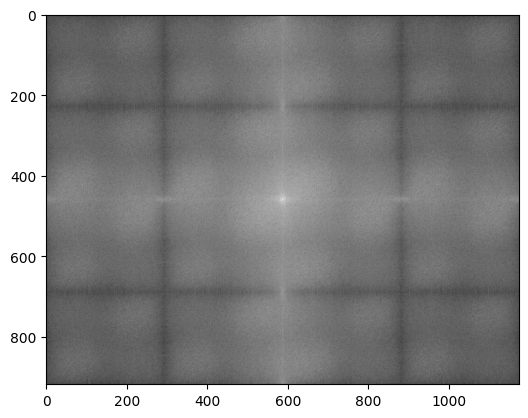

In [1]:
import numpy as np
from scipy import fftpack
import cv2
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('/home/amirali/Desktop/Thesis/Codes/raw_data/natural_scene_templates/natural_scene_0.tiff', 0)

# Perform Fourier Transform
fourier_transform = fftpack.fft2(image)

# Shift the zero-frequency component to the center of the spectrum
fourier_transform_shifted = fftpack.fftshift(fourier_transform)

# Calculate the magnitude of the complex numbers
magnitude = np.abs(fourier_transform_shifted)

# Plot the magnitude
plt.imshow(np.log(magnitude + 1), cmap='gray')
plt.show()

In [14]:
import os
from PIL import ImageStat, Image
from natsort import natsorted
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
imagesData = '/home/amirali/Desktop/Thesis/Codes/raw_data/natural_scene_templates/'
imageFiles = natsorted(os.listdir(imagesData))

In [16]:
def spatial_frequency(image):
    image              = (image - np.mean(image)) / np.std(image)
    fft                = np.fft.fft2(image)
    magnitude_spectrum = np.abs(fft)
    mean_magnitude     = np.mean(magnitude_spectrum)
    return mean_magnitude

In [17]:
spatialfreq = []
for img in imageFiles:
    spatialfreq.append(spatial_frequency(plt.imread(os.path.join(imagesData, img))))

In [18]:
spatialfreq, imageFiles = zip(*sorted(zip(spatialfreq, imageFiles)))

In [19]:
spatialfreqImageIndices = []
for img in imageFiles:
    spatialfreqImageIndices.append(int(img.split('.')[0].split('_')[-1]))